In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import math

def plota_gaussiana(media, variancia):
    '''
    Plota uma função de densidade de probabilidade Gaussiana com uma dada média e variância.
    
    Args:
        - media (int/float): média da distribuição (ponto central)
        - variancia (int/float): variância da distribuição (espalhamento)
    '''
    mu = media
    variance = variancia
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf_ = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf_)
    plt.title(f'Distribuição Gaussiana com Média {media} e Variância {variancia}')
    
    plt.show()
    
    print(f'A distribuição possui um pico com f(x) = {round(max(pdf_),2)}')

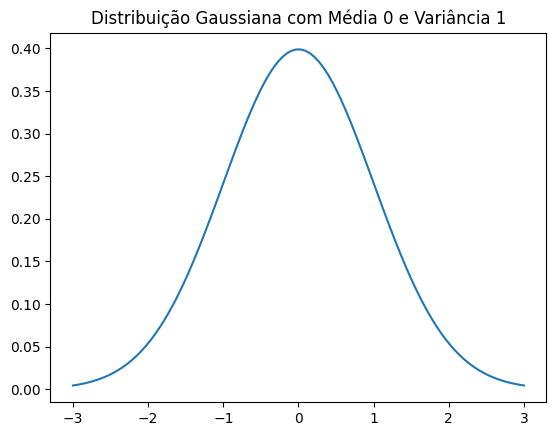

A distribuição possui um pico com f(x) = 0.4


In [3]:
plota_gaussiana(0, 1)

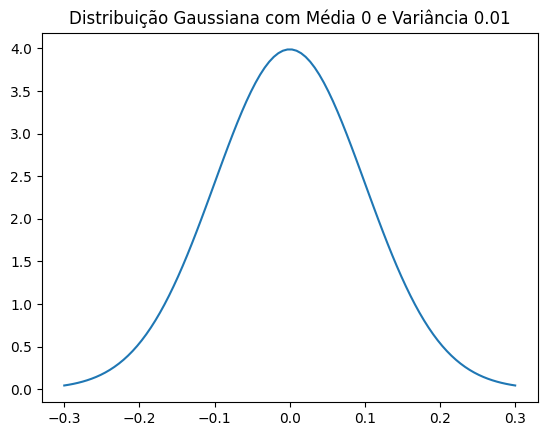

A distribuição possui um pico com f(x) = 3.99


In [4]:
plota_gaussiana(0, 0.01)

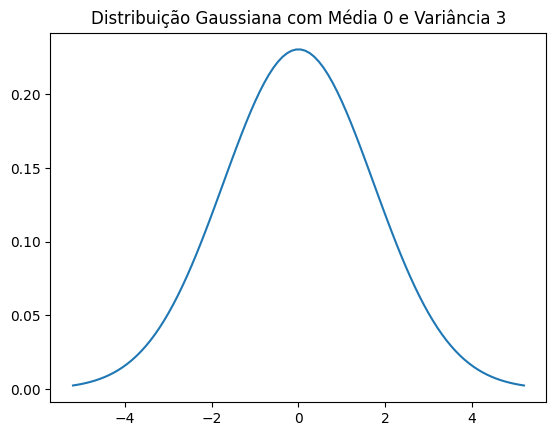

A distribuição possui um pico com f(x) = 0.23


In [5]:
plota_gaussiana(0, 3)

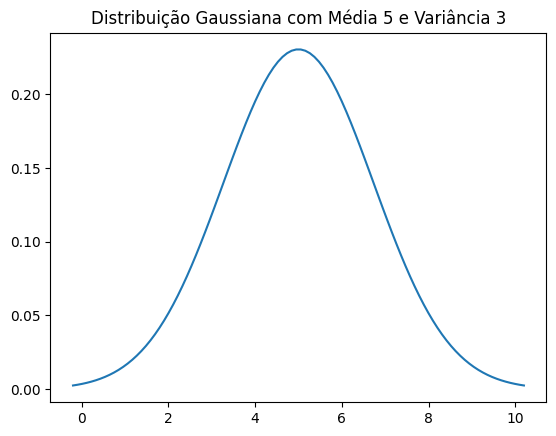

A distribuição possui um pico com f(x) = 0.23


In [6]:
plota_gaussiana(5, 3)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

def plota_gaussianas_2d(medias = [0,0], variancias = [1,1], covariancia = 0):
    '''
    Plota gaussianas com 2 dimensões (2 features), em 3D e sua respectiva curva de nível.
    
    Args:
        - medias (Array com 2 valores): médias para cada uma das features.
        - variancias (Array com 2 valores): Variâncias de cada uma das features
        - covariancia (float/int): valor associado a covariancia das features.
        
    Obs: Lembre-se de que uma matriz de covariância é simétrica. Como lidaremos com Gaussianas de 2 dimensões, teremos apenas os valores da diagonal principal, compostos pela variância de cada variavel e por um único valor de covariancia(valor fora da diagonal principal).
    '''
 
    mu = medias
    cov_m = np.array([[variancias[0], covariancia], [covariancia, variancias[1]]])
    
    print(cov_m)
    #Create grid and multivariate normal
    x = np.linspace(min(mu)-3*cov_m.max(),max(mu)+3*cov_m.max(),500)
    y = np.linspace(min(mu)-3*cov_m.max(),max(mu)+3*cov_m.max(),500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    #rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0.69], [0.69, variance_y]])
    rv = multivariate_normal(mu, cov_m)

    #Make a 3D plot
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    plt.title('PDF Gaussiana - 2 Features')
    plt.show()
    
    fig = plt.figure(figsize=(5,5))
    ax0 = fig.add_subplot(111)
    ax0.contour(X, Y, rv.pdf(pos).reshape(500,500))
    plt.title('Curvas de nível Gaussiana 2 Features')
    plt.show()

[[1 0]
 [0 1]]


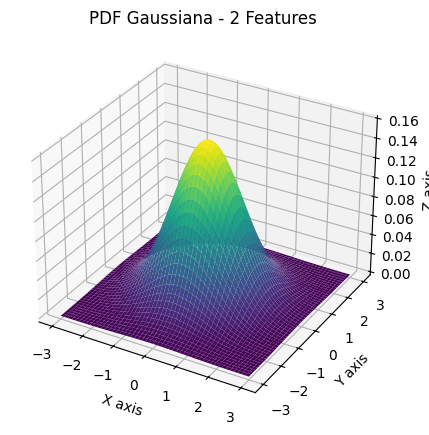

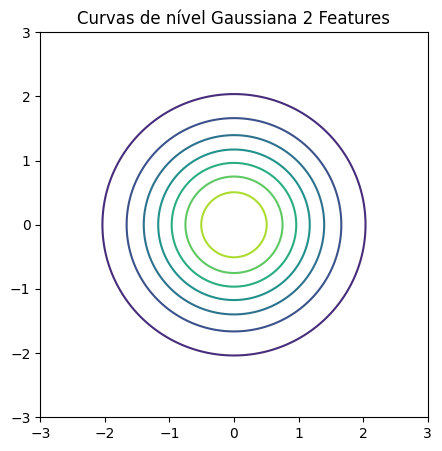

In [14]:
plota_gaussianas_2d([0,0], [1,1], 0)

[[1 0]
 [0 1]]


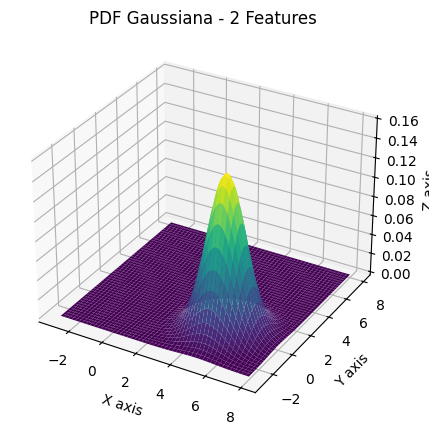

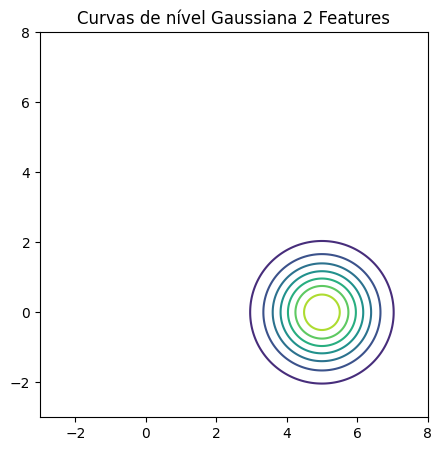

In [15]:
plota_gaussianas_2d(medias = [5,0], variancias = [1,1], covariancia = 0)

[[4 0]
 [0 1]]


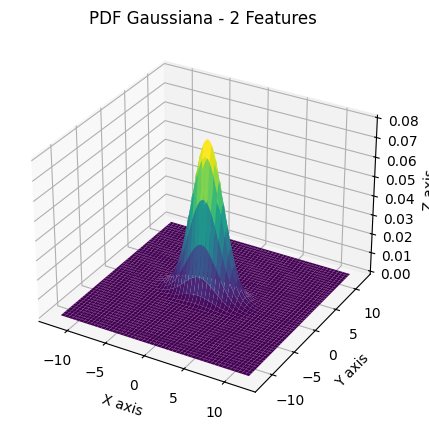

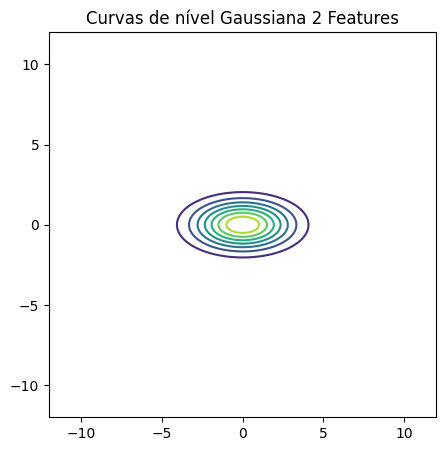

In [16]:
plota_gaussianas_2d(medias = [0,0], variancias = [4,1], covariancia = 0)

[[1 0]
 [0 4]]


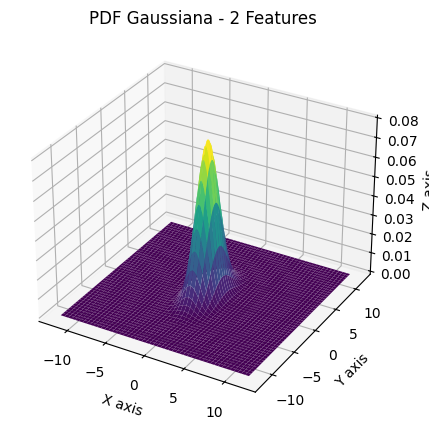

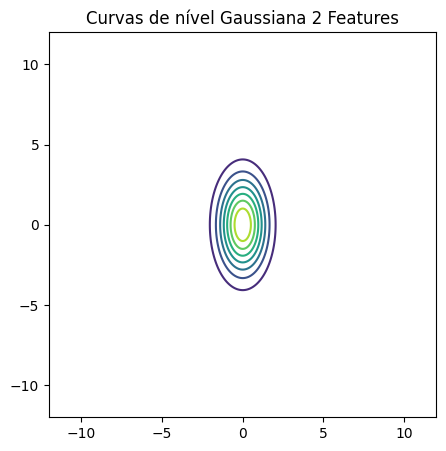

In [17]:
plota_gaussianas_2d(medias = [0,0], variancias = [1,4], covariancia = 0)

[[1.  0.3]
 [0.3 1. ]]


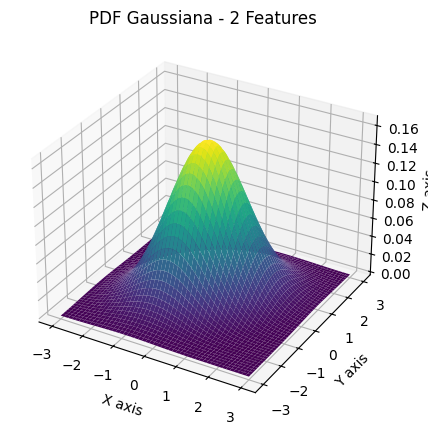

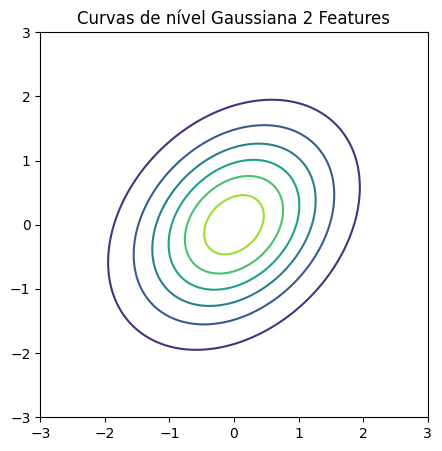

In [18]:
plota_gaussianas_2d(medias = [0,0], variancias = [1,1], covariancia = 0.3)

[[ 1.  -0.3]
 [-0.3  1. ]]


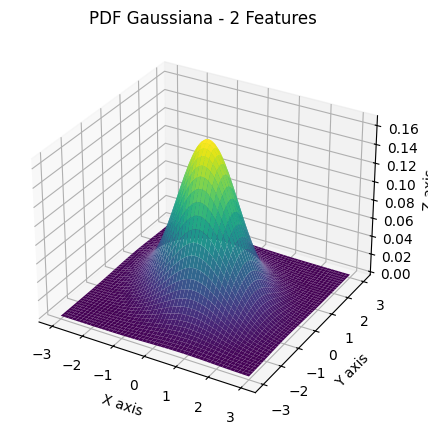

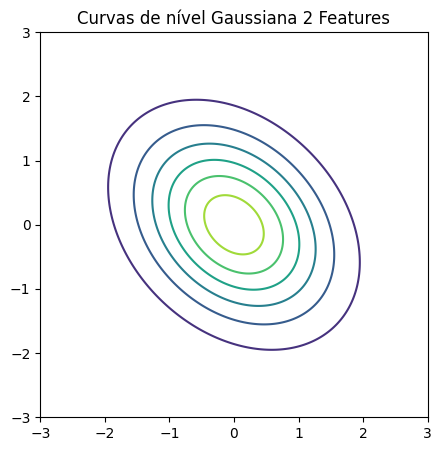

In [19]:
plota_gaussianas_2d(medias = [0,0], variancias = [1,1], covariancia = -0.3)

In [21]:
from sklearn import cluster, datasets, mixture

AMOSTRAS = 2000

np.random.seed(12)

circulos,_ = datasets.make_circles(n_samples=AMOSTRAS, factor=.4,noise=.07, random_state= 12)

bolinhas,_ = datasets.make_blobs(n_samples=AMOSTRAS, random_state=15)

c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\16.GMM\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\mari_\OneDrive\Documentos\Cientista de Dados\16.GMM\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


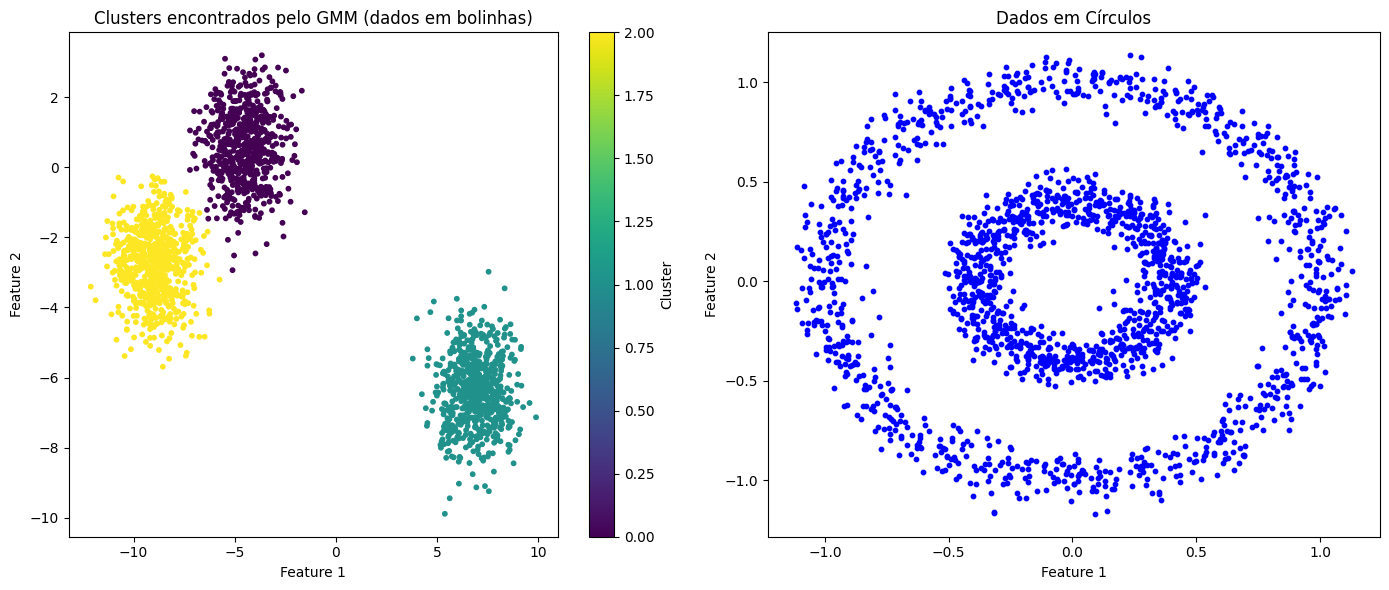

In [22]:
# Ajustar o modelo Gaussian Mixture
gmm = mixture.GaussianMixture(n_components=3, random_state=0)
gmm.fit(bolinhas)

# Prever os rótulos dos clusters
rótulos_clusters = gmm.predict(bolinhas)

# Visualizar os clusters encontrados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os dados de bolinhas com os clusters encontrados
scatter = ax[0].scatter(bolinhas[:, 0], bolinhas[:, 1], c=rótulos_clusters, cmap='viridis', s=10)
ax[0].set_title('Clusters encontrados pelo GMM (dados em bolinhas)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Plotar os dados de círculos com os clusters encontrados
# Neste caso, não se ajusta o modelo GMM aos dados de círculos, mas apenas os plota para comparação
ax[1].scatter(circulos[:, 0], circulos[:, 1], c='blue', s=10)
ax[1].set_title('Dados em Círculos')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.colorbar(scatter, ax=ax[0], label='Cluster')
plt.tight_layout()
plt.show()


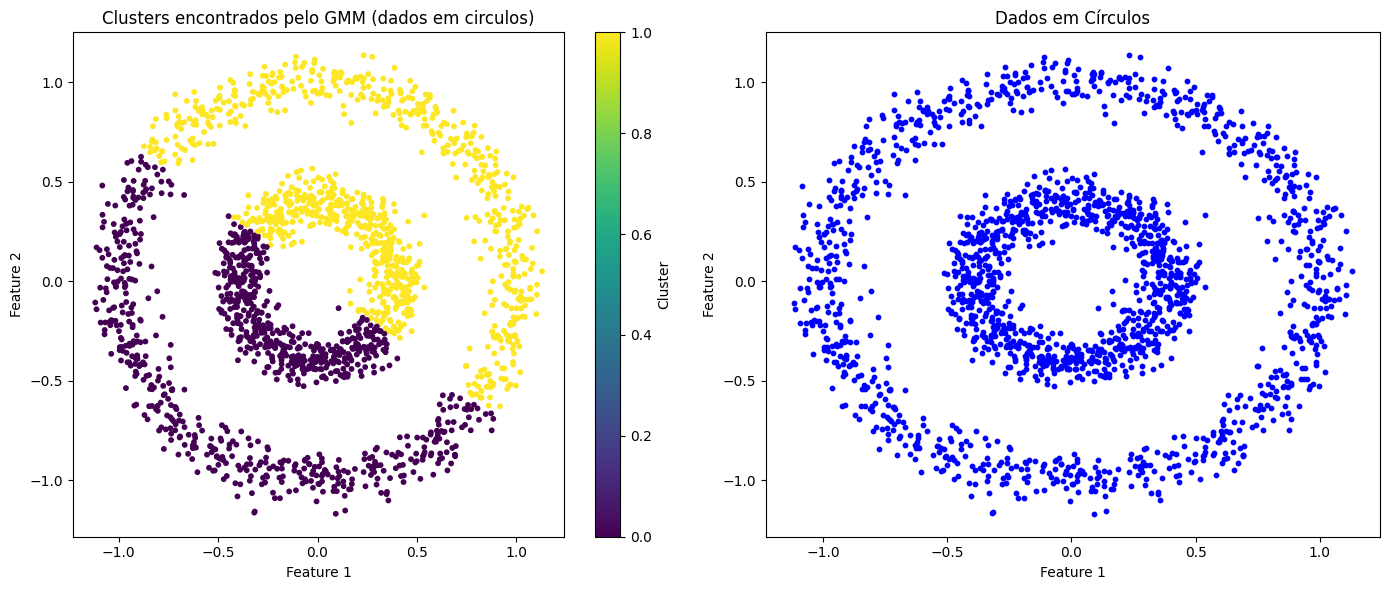

In [23]:
# Ajustar o modelo Gaussian Mixture
gmm = mixture.GaussianMixture(n_components=2, random_state=0)
gmm.fit(circulos)

# Prever os rótulos dos clusters
rótulos_clusters = gmm.predict(circulos)

# Visualizar os clusters encontrados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotar os dados de circulos com os clusters encontrados
scatter = ax[0].scatter(circulos[:, 0], circulos[:, 1], c=rótulos_clusters, cmap='viridis', s=10)
ax[0].set_title('Clusters encontrados pelo GMM (dados em circulos)')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2')

# Plotar os dados de círculos com os clusters encontrados
# Neste caso, não se ajusta o modelo GMM aos dados de círculos, mas apenas os plota para comparação
ax[1].scatter(circulos[:, 0], circulos[:, 1], c='blue', s=10)
ax[1].set_title('Dados em Círculos')
ax[1].set_xlabel('Feature 1')
ax[1].set_ylabel('Feature 2')

plt.colorbar(scatter, ax=ax[0], label='Cluster')
plt.tight_layout()
plt.show()

In [24]:
# Variáveis para armazenar o melhor modelo e o menor valor de BIC
best_num_components = None
best_bic = np.inf

# Laço para ajustar modelos GMM com diferentes números de clusters
for n_components in range(1, 16):
    # Ajustar o modelo GMM
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(bolinhas)
    
    # Calcular o BIC
    bic = gmm.bic(bolinhas)
    
    # Atualizar o melhor modelo se o BIC for menor
    if bic < best_bic:
        best_bic = bic
        best_num_components = n_components

print(f'O número ideal de clusters, de acordo com o menor valor de BIC, é: {best_num_components}')

O número ideal de clusters, de acordo com o menor valor de BIC, é: 3


In [25]:
# Variáveis para armazenar o melhor modelo e o menor valor de BIC
best_num_components = None
best_bic = np.inf

# Laço para ajustar modelos GMM com diferentes números de clusters
for n_components in range(1, 16):
    # Ajustar o modelo GMM
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(circulos)
    
    # Calcular o BIC
    bic = gmm.bic(circulos)
    
    # Atualizar o melhor modelo se o BIC for menor
    if bic < best_bic:
        best_bic = bic
        best_num_components = n_components

print(f'O número ideal de clusters, de acordo com o menor valor de BIC, é: {best_num_components}')

O número ideal de clusters, de acordo com o menor valor de BIC, é: 14


In [26]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

scaler = MinMaxScaler()

df_iris[:] = scaler.fit_transform(df_iris[:])

In [27]:
# Variáveis para armazenar o melhor modelo e o menor valor de BIC
best_num_components = None
best_bic = np.inf

# Laço para ajustar modelos GMM com diferentes números de clusters
for n_components in range(1, 16):
    # Ajustar o modelo GMM
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(df_iris)
    
    # Calcular o BIC
    bic = gmm.bic(df_iris)
    
    # Atualizar o melhor modelo se o BIC for menor
    if bic < best_bic:
        best_bic = bic
        best_num_components = n_components

print(f'O número ideal de clusters, de acordo com o menor valor de BIC, é: {best_num_components}')

O número ideal de clusters, de acordo com o menor valor de BIC, é: 2


In [29]:
# Variáveis para armazenar o melhor modelo e o menor valor de AIC
best_num_components = None
best_aic = np.inf

# Laço para ajustar modelos GMM com diferentes números de clusters
for n_components in range(1, 16):
    # Ajustar o modelo GMM
    gmm = mixture.GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(df_iris)
    
    # Calcular o AIC
    aic = gmm.aic(df_iris)
    
    # Atualizar o melhor modelo se o AIC for menor
    if aic < best_aic:
        best_aic = aic
        best_num_components = n_components

print(f'O número ideal de clusters, de acordo com o menor valor de AIC, é: {best_num_components}')

O número ideal de clusters, de acordo com o menor valor de AIC, é: 13
